***
# 1.1 Coarse labeling for Bird 22
### JX, 07/15/2022
***

    Bird22:
    LS110593.9.8.2018Araluen.WAV
    LS110640.10.1.2018Araluen.WAV
    
***

In [1]:
indv = "Bird22"

## Load up Note Dataframe

In [2]:
import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

In [4]:
note_df = pd.read_pickle(SAVE_LOC)
note_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,513.78,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,513.78,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,513.78,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,513.78,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,513.78,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Shift to Designated Individual

In [5]:
indv_df = note_df[note_df.indv == indv]
indv_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,2.37,4.24,1.87,8,0,2.370000,2.415699,0.045699,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, -5.558967174674641e-06, -5.2225732263302...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,2.37,4.24,1.87,8,1,2.660000,2.977558,0.317558,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, 3.069944854750729e-05, 4.037410245845782...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,2.37,4.24,1.87,8,2,3.079714,3.173357,0.093643,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, 0.0030796517861769505, 0.008741865222086...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,2.37,4.24,1.87,8,3,3.260000,3.581982,0.321982,Bird22,0,LS110593.9.8.2018Araluen_dn,"[-0.0, -0.00020854328852771913, -0.00037995893...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,2.37,4.24,1.87,8,4,3.664275,3.718191,0.053916,Bird22,0,LS110593.9.8.2018Araluen_dn,"[-0.0, -0.0018707999847079283, -0.003892325714...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Perform Coarse Labeling

In [6]:
from butcherbird.label.label import labeler
from datetime import datetime

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/label/label.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [7]:
datetime.now().isoformat(timespec='minutes')

'2022-07-15T11:53'

In [8]:
indv_df, discoverable = labeler(indv_df,
                                label = 'hdbscan_labels', 
                                log_scaling_factor = 5, 
                                log_scaling_boolean = False,
                                lin_scaling_factor = 0.1, 
                                lin_scaling_boolean = True,
                                n_jobs = 36, 
                                verbosity = -1, 
                                min_dist = 0.1,
                                n_neighbors_factor = 0.01, 
                                stopping_nn = 50,
                                min_cluster_size_factor = 0.01,
                                stopping_cluster_size = 10)


/Initiating Labeler Unit
//lin-resize with factor 0.1


linear scaling spectrograms:   0%|          | 0/3571 [00:00<?, ?it/s]

[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 369 tasks      | elapsed:   10.7s


//Pad Spectrograms to 76 mode: center


[Parallel(n_jobs=36)]: Done 3571 out of 3571 | elapsed:   14.7s finished


padding spectrograms:   0%|          | 0/3571 [00:00<?, ?it/s]

[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 392 tasks      | elapsed:    0.2s
[Parallel(n_jobs=36)]: Done 3500 out of 3571 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=36)]: Done 3571 out of 3571 | elapsed:    0.7s finished


Nearest Neighbor Count: 50
/Projecting to UMAP...
using regular
UMAP(n_jobs=36, n_neighbors=50, verbose=-1)
Fri Jul 15 11:53:28 2022 Construct fuzzy simplicial set
Fri Jul 15 11:53:47 2022 Finding Nearest Neighbors
Fri Jul 15 11:53:50 2022 Finished Nearest Neighbor Search
Fri Jul 15 11:53:53 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Jul 15 11:54:01 2022 Finished embedding
/Clustering with min_cluster_size = 35

Discovered 22 Clusters, potential subclusters discoverable in deeper layers




/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/label/label.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df[umap_nm] = z
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/label/label.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:, label] = list(clusterer.labels_)


In [9]:
datetime.now().isoformat(timespec='minutes')

'2022-07-15T11:54'

## Construct Visualization of Coarse Labeling

In [10]:
from butcherbird.visualization.projections import scatter_spec
import matplotlib.pyplot as plt
import numpy as np

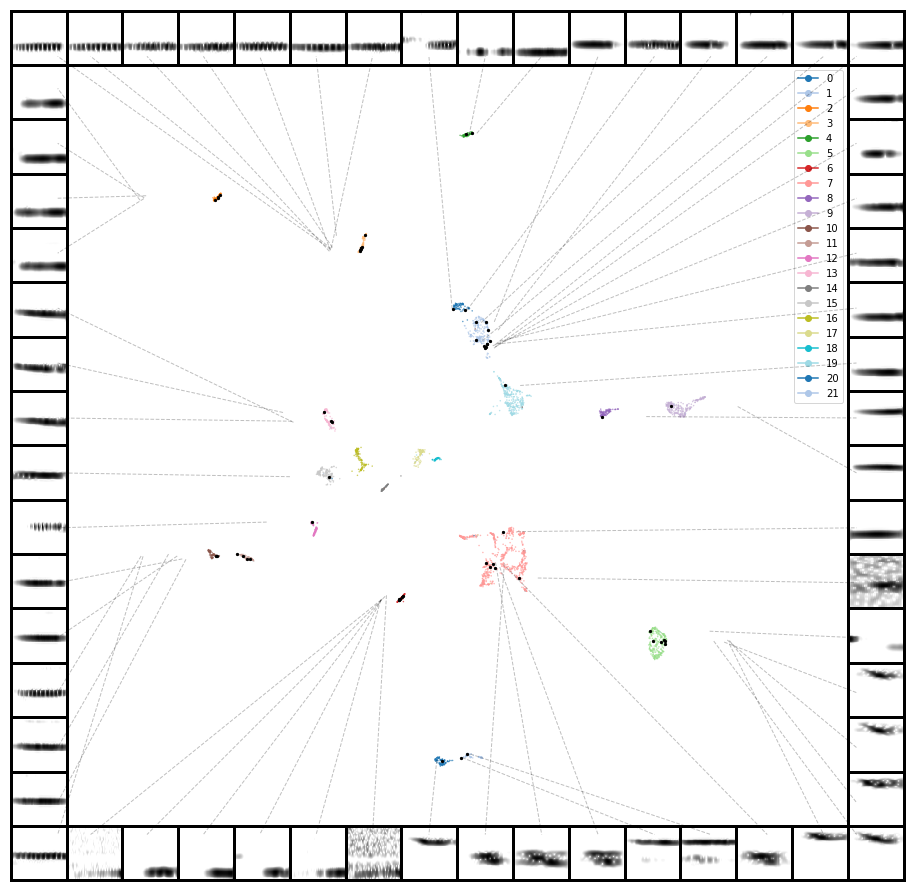

In [11]:
scatter_spec(
    np.vstack(indv_df.umap),
    indv_df.spectrogram, 
    column_size = 16,
    pal_color = 'tab20',
    color_points = False,
    enlarge_points = 5, 
    figsize = (16,16),
    scatter_kwargs = {
        'labels': list(indv_df['hdbscan_labels'].values),
        'alpha':0.75, 
        's': 0.25,
        'show_legend': True
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':1,
        'ls':'dashed',
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset = 1000,
    border_line_width = 3,
);
plt.show()

## Save 

In [12]:
from butcherbird.utils.paths import DATA_DIR, ensure_dir
import pathlib2

In [13]:
SAVE_LOC = 'interim/coarse_labels/butcherbird_note_df_'+indv+'.pickle'

In [14]:
SAVE_LOC = DATA_DIR / SAVE_LOC

In [15]:
ensure_dir(SAVE_LOC)

In [16]:
indv_df.to_pickle(SAVE_LOC)